In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, List, Union
from abc import ABCMeta

In [2]:
sber = pd.read_csv("SBER_101001_171001.txt")
mvid = pd.read_csv("MVID_101001_171001.txt")
yndx = pd.read_csv("YNDX_101001_171001.txt")

In [3]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [4]:
mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [5]:
yndx.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,YNDX,D,20140604,0,1170.0,35146
1,YNDX,D,20140605,0,1145.1,24973
2,YNDX,D,20140606,0,1163.0,7889
3,YNDX,D,20140609,0,1172.1,7304
4,YNDX,D,20140610,0,1170.0,3207


In [6]:
sber.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64

In [7]:
mvid.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64

In [8]:
yndx.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64

In [9]:
data = sber.merge(mvid, on="<DATE>").merge(yndx, on="<DATE>")

In [10]:
data.shape

(838, 16)

In [11]:
data.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y,<TICKER>,<PER>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20140604,0,87.81,118784670,MVID,D,0,260.02,99820,YNDX,D,0,1170.0,35146
1,SBER,D,20140605,0,87.43,136633680,MVID,D,0,259.81,84590,YNDX,D,0,1145.1,24973
2,SBER,D,20140606,0,89.00,127884670,MVID,D,0,258.99,99700,YNDX,D,0,1163.0,7889
3,SBER,D,20140609,0,88.89,84744280,MVID,D,0,254.45,63820,YNDX,D,0,1172.1,7304
4,SBER,D,20140610,0,88.99,85841300,MVID,D,0,256.00,72120,YNDX,D,0,1170.0,3207


In [12]:
Y_sber = data["<CLOSE>_x"]
Y_mvid = data["<CLOSE>_y"]
Y_yndx = data["<CLOSE>_y"]

In [13]:
X_sber = sber.drop("<CLOSE>", axis=1)
X_mvid = mvid.drop("<CLOSE>", axis=1)
X_yndx = yndx.drop("<CLOSE>", axis=1)

In [14]:
X_sber.head()
# X_mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<VOL>
0,SBER,D,20101001,0,332429890
1,SBER,D,20101004,0,194032721
2,SBER,D,20101005,0,198775753
3,SBER,D,20101006,0,210406027
4,SBER,D,20101007,0,145137617


In [15]:

class RegressionSample(metaclass=ABCMeta):
    @staticmethod
    def get_sample(X: pd.Series, y: pd.Series) -> Tuple[pd.Series, pd.Series]:
        pass


class RegressionRandomSample(RegressionSample):
    @staticmethod
    def get_sample(X: pd.Series, y: pd.Series) -> Tuple[pd.Series, pd.Series]:
        f = random.randrange(0, len(X))
        r = random.randrange(f, len(X))
        return X[f:r], y[f:r]


class Regression:
    def __init__(self, sample: Union[RegressionSample, None] = None):
        self.b0 = 0
        self.b1 = 0
        self.__max = 0
        self.__min = 0
        self.sample = sample

    def predict(self, X: Union[np.ndarray, pd.Series]) -> Union[np.ndarray, pd.Series]:
        return self.b0 + self.b1 * ((X - self.__min) / (self.__max - self.__min))

    def error(self, X: pd.Series, y: pd.Series) -> int:
        return sum((self.predict(X) - y) ** 2) / (2 * len(X))

    def fit(self, X: pd.Series, y: pd.Series) -> Tuple[range, List[int]]:
        if self.sample is not None:
            X, y = self.sample.get_sample(X, y)
        alpha = 0.1
        errors, steps = [], range(898)
        for step in steps:
            self.__max = np.max(X)
            self.__min = np.min(X)

            dJ0 = sum(self.predict(X) - y) / len(X)
            dJ1 = sum(
                (self.predict(X) - y) * ((X - self.__min) / (self.__max - self.__min))
            ) / len(X)

            self.b0 = self.b0 - alpha * dJ0
            self.b1 = self.b1 - alpha * dJ1

            errors.append(self.error(X, y))

            if step != 0 and errors[-2] < (errors[-1] - 2):
                alpha = alpha * 0.1
        return steps, errors


# SBER x MVID
Используется случайный кусок данных для обучения RegressionRandomSample()

In [16]:
model = Regression(sample=RegressionRandomSample())
steps, errors = model.fit(Y_sber, Y_mvid)
model.predict(Y_sber)

0      224.420161
1      223.686574
2      226.717448
3      226.505094
4      226.698143
          ...    
833    426.600697
834    428.840069
835    425.481011
836    426.195293
837    427.488724
Name: <CLOSE>_x, Length: 838, dtype: float64

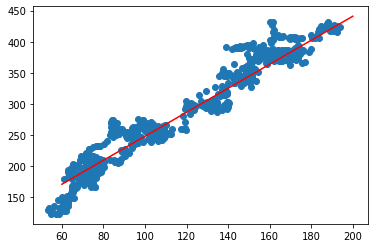

In [17]:
X0 = np.linspace(60, 200, 100)
Y0 = model.predict(X0)

plt.figure()
plt.scatter(Y_sber, Y_mvid)
plt.plot(X0, Y0, "r")
plt.show()

In [18]:
print(f"{model.error(Y_sber, Y_mvid)=}")

model.error(Y_sber, Y_mvid)=200.2465751896314


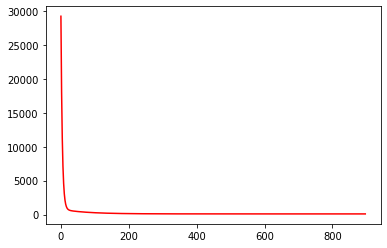

In [19]:
plt.figure()
plt.plot(steps, errors, "r")
plt.show()


# SBER x YNDX
Используется случайный кусок данных для обучения RegressionRandomSample()

In [20]:
model = Regression(sample=RegressionRandomSample())
steps, errors = model.fit(Y_sber, Y_yndx)
model.predict(Y_sber)

0      230.321632
1      229.626015
2      232.500012
3      232.298649
4      232.481706
          ...    
833    422.037347
834    424.160810
835    420.975616
836    421.652927
837    422.879410
Name: <CLOSE>_x, Length: 838, dtype: float64

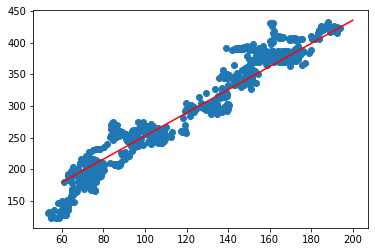

In [21]:
X0 = np.linspace(60, 200, 100)
Y0 = model.predict(X0)

plt.figure()
plt.scatter(Y_sber, Y_yndx)
plt.plot(X0, Y0, "r")
plt.show()

In [22]:
print(f"{model.error(Y_sber, Y_mvid)=}")

model.error(Y_sber, Y_mvid)=214.0343535659201


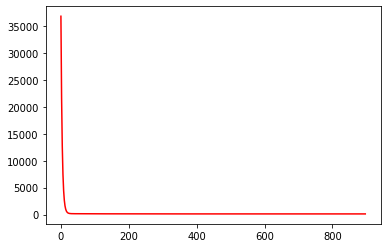

In [23]:
plt.figure()
plt.plot(steps, errors, "r")
plt.show()

# sklearn
Ошибки где то под капотом, по виду можно вытаскивать только предсказания

In [24]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Y_sber_1 = data["<CLOSE>_x"].values
Y_mvid_1 = data["<CLOSE>_y"].values
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=110, tol=1e-1))
reg.fit(Y_sber_1.reshape(-1, 1), Y_mvid_1)
answers = reg.predict(Y_mvid_1.reshape(-1, 1))
print(answers)

[576.36675275 575.94029457 574.2750769  565.05545713 568.20312467
 573.56431326 586.47990395 582.8245481  596.63367022 605.97513518
 604.35053258 597.44597152 596.61336269 592.57216371 594.86691489
 590.21648994 596.47120996 590.54141046 594.5623019  567.18774805
 565.46160778 569.70588208 568.4062     568.18281714 554.41431008
 547.79405448 561.76563686 557.11521191 560.68933764 534.98000145
 525.86191934 519.4650466  520.48042322 519.91181231 521.0896492
 515.9112284  509.67681592 509.31128033 511.32172605 510.77342267
 497.75629432 497.28922107 497.63444912 485.95761792 474.80878256
 473.7730984  477.83460491 484.45486051 485.91700285 483.03333323
 478.84998153 476.04754204 475.43831607 478.13921789 476.81922828
 466.42177162 458.13629835 456.51169575 431.12728008 434.17340996
 434.78263594 432.12234918 420.97351382 451.8612708  446.29700688
 452.91726249 447.88099442 448.91667858 434.17340996 435.6964749
 431.22881774 440.7530505  438.82383491 439.25029309 440.24536219
 444.3068686